---
title: Frozen Phonons
authors: [gvarnavides]
date: 2025-02-01
---

In [2]:
# %matplotlib widget

import abtem
import ase
import numpy as np
import matplotlib.pyplot as plt

abtem.config.set({"dask.lazy":False});

In [21]:
srtio3_unit_cell = ase.io.read("data/SrTiO3.cif")
srtio3 = srtio3_unit_cell*(4,4,48)

In [22]:
frozen_phonons = abtem.FrozenPhonons(srtio3, num_configs=8, sigmas=0.1, seed=2025)

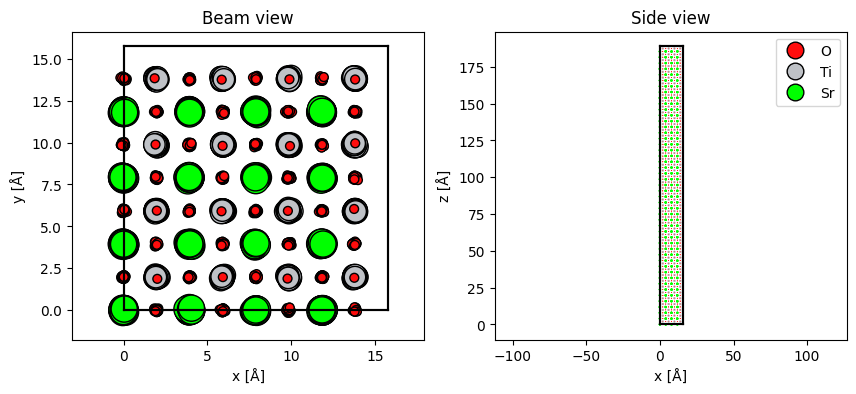

In [39]:
#| label: app:phonons_configurations
atoms_configuration = next(iter(frozen_phonons))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
abtem.show_atoms(atoms_configuration, scale=0.4, ax=ax1, title="Beam view")
abtem.show_atoms(
    atoms_configuration,
    scale=0.4,
    plane="xz",
    legend=True,
    ax=ax2,
    title="Side view",
    linewidth=0.0,
);

In [24]:
potential_static = abtem.Potential(srtio3, gpts=384, slice_thickness=2)
potential_phonon = abtem.Potential(frozen_phonons, gpts=384, slice_thickness=2)

In [32]:
initial_waves = abtem.PlaneWave(energy=200e3)

exit_waves_static = initial_waves.multislice(potential_static)
exit_waves_phonon = initial_waves.multislice(potential_phonon)

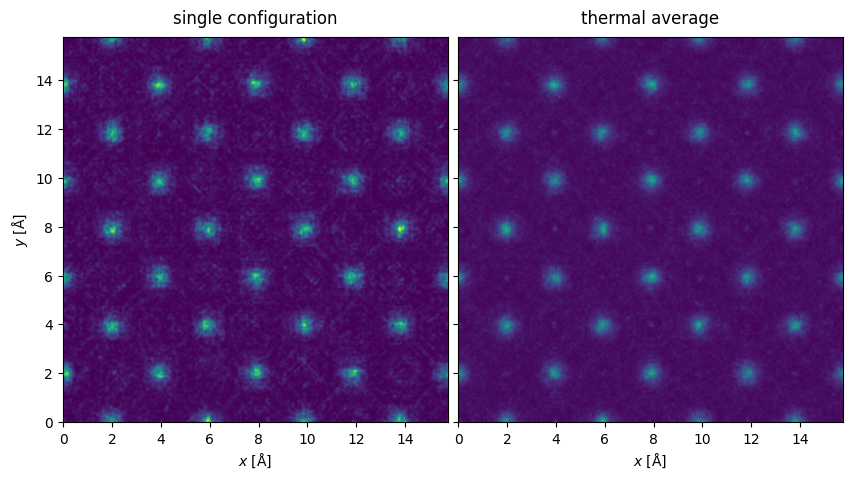

In [43]:
#| label: app:phonons_potentials

stacked = abtem.stack(
    [exit_waves_phonon[0].intensity(), exit_waves_phonon.intensity().mean(0)],
    ("single configuration", "thermal average"),
)

stacked.show(explode=True, figsize=(10, 4.5), common_color_scale=True);

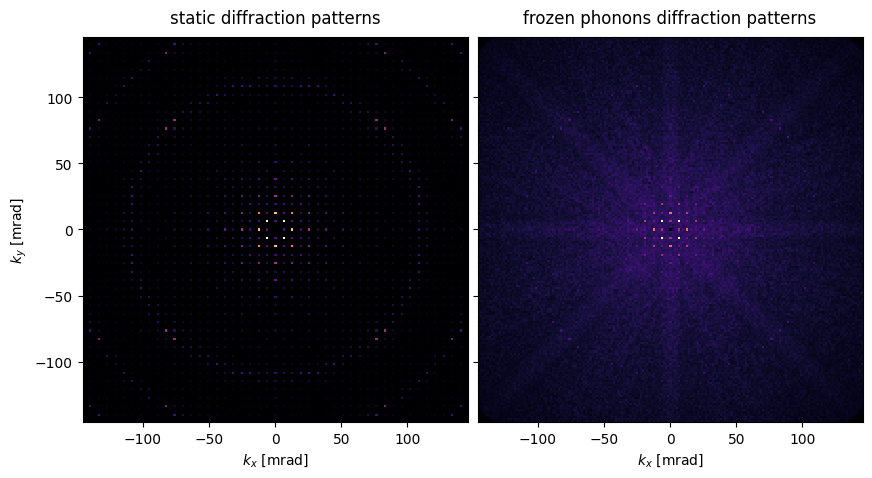

In [46]:
#| label: app:phonons_kikuchi

diffraction_patterns_static = exit_waves_static.diffraction_patterns(
    max_angle="valid", block_direct=True
)
diffraction_patterns_phonons = exit_waves_phonon.diffraction_patterns(
    max_angle="valid", block_direct=True
).mean(0)

diffraction_patterns = abtem.stack(
    [
        diffraction_patterns_static,
        diffraction_patterns_phonons,
    ],
    ("static diffraction patterns", "frozen phonons diffraction patterns"),
)

diffraction_patterns.show(
    explode=True,
    power=0.25,
    units="mrad",
    figsize=(10, 4.5),
    cmap='magma',
    common_color_scale=True,
);